In [16]:
#Imports
import re
import unicodedata
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from env import get_connection

from acquire import get_news_articles, get_blog_articles

In [2]:
url = get_connection('spam_db')

In [3]:
#Define SQL query
query = '''
        SELECT *
        FROM spam
        '''

In [4]:
df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Define function to clean up text data
def clean_text(text, extra_stopwords=['r', 'u', '2', 'ltgt']):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
ham_words = clean_text(' '.join(df[df['label'] == 'ham']['text']))
spam_words = clean_text(' '.join(df[df['label'] == 'spam']['text']))
all_words = clean_text(' '.join(df['text']))

In [7]:
ham_counts = pd.Series(ham_words).value_counts()
spam_counts = pd.Series(spam_words).value_counts()
all_counts = pd.Series(all_words).value_counts()

In [8]:
word_freq = pd.concat([ham_counts, spam_counts, all_counts], axis=1)
word_freq.head()

,0,1,2
im,449.0,13.0,462
get,314.0,83.0,397
go,273.0,31.0,304
ok,272.0,5.0,277
dont,257.0,22.0,279


In [9]:
word_freq.columns = ['ham', 'spam', 'all']
word_freq.fillna(0, inplace=True)
word_freq.head()

,ham,spam,all
im,449.0,13.0,462
get,314.0,83.0,397
go,273.0,31.0,304
ok,272.0,5.0,277
dont,257.0,22.0,279


In [10]:
word_freq = word_freq.astype('int')
word_freq.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


In [11]:
word_freq['pct_ham'] = word_freq['ham'] / word_freq['all'] * 100
word_freq['pct_spam'] = word_freq['spam'] / word_freq['all'] * 100
word_freq.head()

,ham,spam,all,pct_ham,pct_spam
im,449,13,462,97.186147,2.813853
get,314,83,397,79.093199,20.906801
go,273,31,304,89.802632,10.197368
ok,272,5,277,98.194946,1.805054
dont,257,22,279,92.114695,7.885305


In [14]:
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3))
ham_trigrams.head(10)

0          (go, jurong, point)
1       (jurong, point, crazy)
2    (point, crazy, available)
3    (crazy, available, bugis)
4        (available, bugis, n)
5            (bugis, n, great)
6            (n, great, world)
7           (great, world, la)
8               (world, la, e)
9              (la, e, buffet)
dtype: object

In [15]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3))
spam_trigrams.head(10)

0    (free, entry, wkly)
1    (entry, wkly, comp)
2      (wkly, comp, win)
3        (comp, win, fa)
4         (win, fa, cup)
5       (fa, cup, final)
6     (cup, final, tkts)
7    (final, tkts, 21st)
8      (tkts, 21st, may)
9      (21st, may, 2005)
dtype: object

In [18]:
url = 'https://codeup.com/blog/'

codeup_df = pd.DataFrame(get_blog_articles(url))
codeup_df

,title,date_published,content
0,Black Excellence in Tech: Panelist Spotlight -...,"Feb 16, 2023",Codeup is hosting a Black Excellence in Tech ...
1,Black excellence in tech: Panelist Spotlight -...,"Feb 13, 2023",Codeup is hosting our second Black Excellence ...
2,Black excellence in tech: Panelist Spotlight -...,"Feb 10, 2023",Codeup is hosting our second Black Excellence ...
3,Black excellence in tech: Panelist Spotlight -...,"Feb 6, 2023",Codeup is hosting our second Black Excellence ...
4,Coding Bootcamp or Self-Learning? Which is Bes...,"Jan 20, 2023",If you’re interested in embarking on a career ...
5,Codeup Among Top 58 Best Coding Bootcamps of 2...,"Jan 12, 2023",Codeup was highlighted for being an establishe...


In [21]:
content = clean_text(' '.join(codeup_df['content']))

In [22]:
content

['codeup',
 'hosting',
 'black',
 'excellence',
 'tech',
 'panel',
 'honor',
 'black',
 'history',
 'month',
 'february',
 '22',
 '2023',
 'celebrate',
 'wed',
 'like',
 'spotlight',
 'panelist',
 'leading',
 'discussion',
 'learn',
 'bit',
 'respective',
 'experience',
 'black',
 'leader',
 'tech',
 'industry',
 'meet',
 'wilmarie',
 'wilmarie',
 'veteran',
 'expanding',
 'knowledge',
 'programming',
 'language',
 'technology',
 'journey',
 'codeup',
 'asked',
 'wilmarie',
 'share',
 'experience',
 'codeup',
 'share',
 'able',
 'meet',
 'people',
 'passionate',
 'coding',
 'positive',
 'learning',
 'environment',
 'submit',
 'email',
 'address',
 'gain',
 'access',
 'information',
 'program',
 'financial',
 'aid',
 'benefit',
 'may',
 'even',
 'send',
 'free',
 'swag',
 'love',
 'researching',
 'data',
 'reading',
 'fine',
 'print',
 'youll',
 'well',
 'program',
 'codeup',
 'hosting',
 'second',
 'black',
 'excellence',
 'tech',
 'panel',
 'honor',
 'black',
 'history',
 'month',
 'f

In [23]:
word_freq = pd.Series(content).value_counts()

In [24]:
word_freq

program       19
codeup        18
black         12
tech          12
experience    10
              ..
delivery       1
serf           1
infinite       1
example        1
ranking        1
Length: 287, dtype: int64

In [29]:
content_bigrams = pd.Series(nltk.ngrams(content, 2))
content_bigrams

0        (codeup, hosting)
1         (hosting, black)
2      (black, excellence)
3       (excellence, tech)
4            (tech, panel)
              ...         
614        (reading, fine)
615          (fine, print)
616         (print, youll)
617          (youll, well)
618        (well, program)
Length: 619, dtype: object

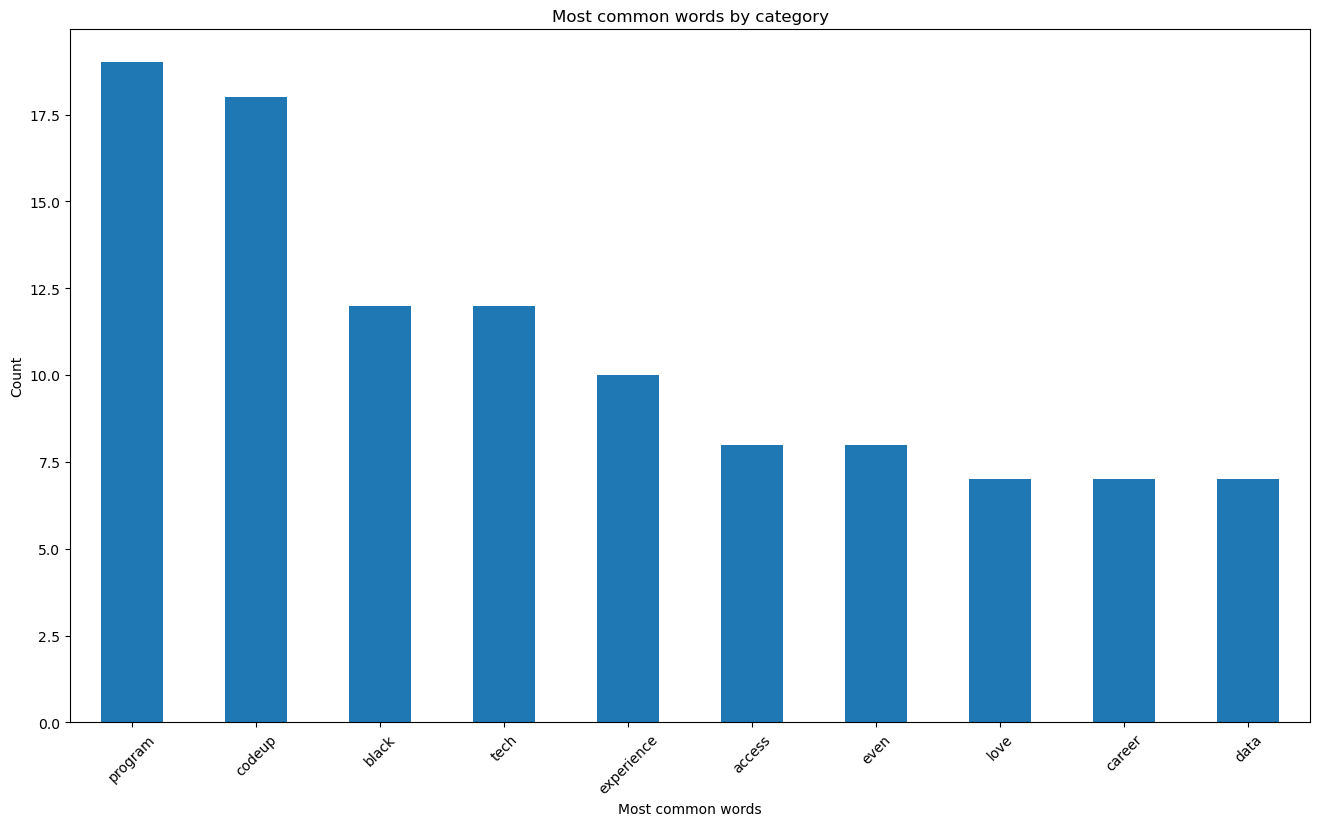

In [27]:
word_freq.sort_values(ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

In [33]:
top_content_bigrams = content_bigrams.value_counts().head(10)
top_content_bigrams

(fine, print)             6
(may, even)               6
(submit, email)           6
(email, address)          6
(address, gain)           6
(gain, access)            6
(access, information)     6
(information, program)    6
(program, financial)      6
(financial, aid)          6
dtype: int64

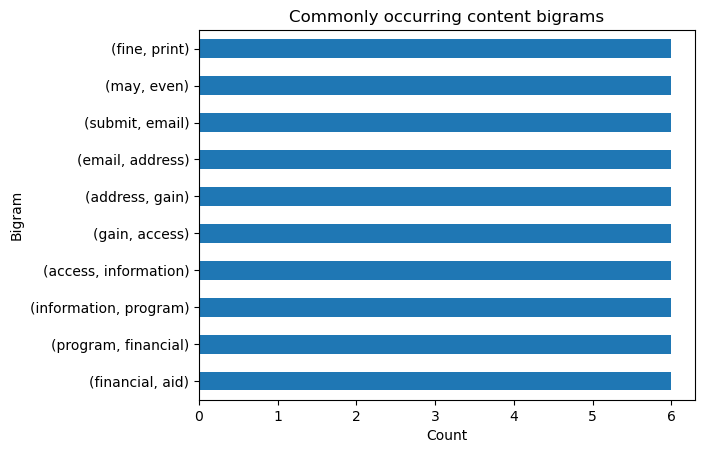

In [34]:
top_content_bigrams.plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Commonly occurring content bigrams')
plt.show()

In [35]:
topics = ['sports','business','technology','entertainment']

news_df = pd.DataFrame(get_news_articles(topics))
news_df

,category,title,content
0,sports,India's Ravichandran Ashwin becomes world numb...,Team India all-rounder Ravichandran Ashwin has...
1,sports,You are a harsh man: Hayden to Gavaskar over r...,Former Australia opener Matthew Hayden called ...
2,sports,I just didn't agree with a lot of his opinions...,"Ex-Australia batter Mark Waugh, who commentate..."
3,sports,Virat Kohli's reaction to Umesh Yadav equallin...,A video has gone viral on social media showing...
4,sports,Family of Kobe Bryant awarded around ₹240 cror...,Los Angeles County will pay Kobe Bryant's fami...
...,...,...,...
95,entertainment,"Diagnosed with Influenza B, staying away from ...",Actress Debina Bonnerjee took to Instagram Sto...
96,entertainment,Actors today focus on gym and social media mor...,Actor Govind Namdev has said that the current ...
97,entertainment,I relived my battle: Sagarika on Rani's 'Mrs C...,"Sagarika Chatterjee, whose life inspired Rani ..."
98,entertainment,Not solo anymore: Sidharth as paparazzi ask hi...,Sidharth Malhotra was recently asked to pose s...


In [36]:
news_content = clean_text(' '.join(news_df['content']))

In [37]:
news_word_freq = pd.Series(news_content).value_counts()

In [38]:
news_content_bigrams = pd.Series(nltk.ngrams(news_content, 2))
news_content_bigrams

0                    (team, india)
1              (india, allrounder)
2       (allrounder, ravichandran)
3           (ravichandran, ashwin)
4                 (ashwin, become)
                   ...            
3658            (character, kapil)
3659               (kapil, called)
3660                 (called, fan)
3661                     (fan, da)
3662                    (da, work)
Length: 3663, dtype: object

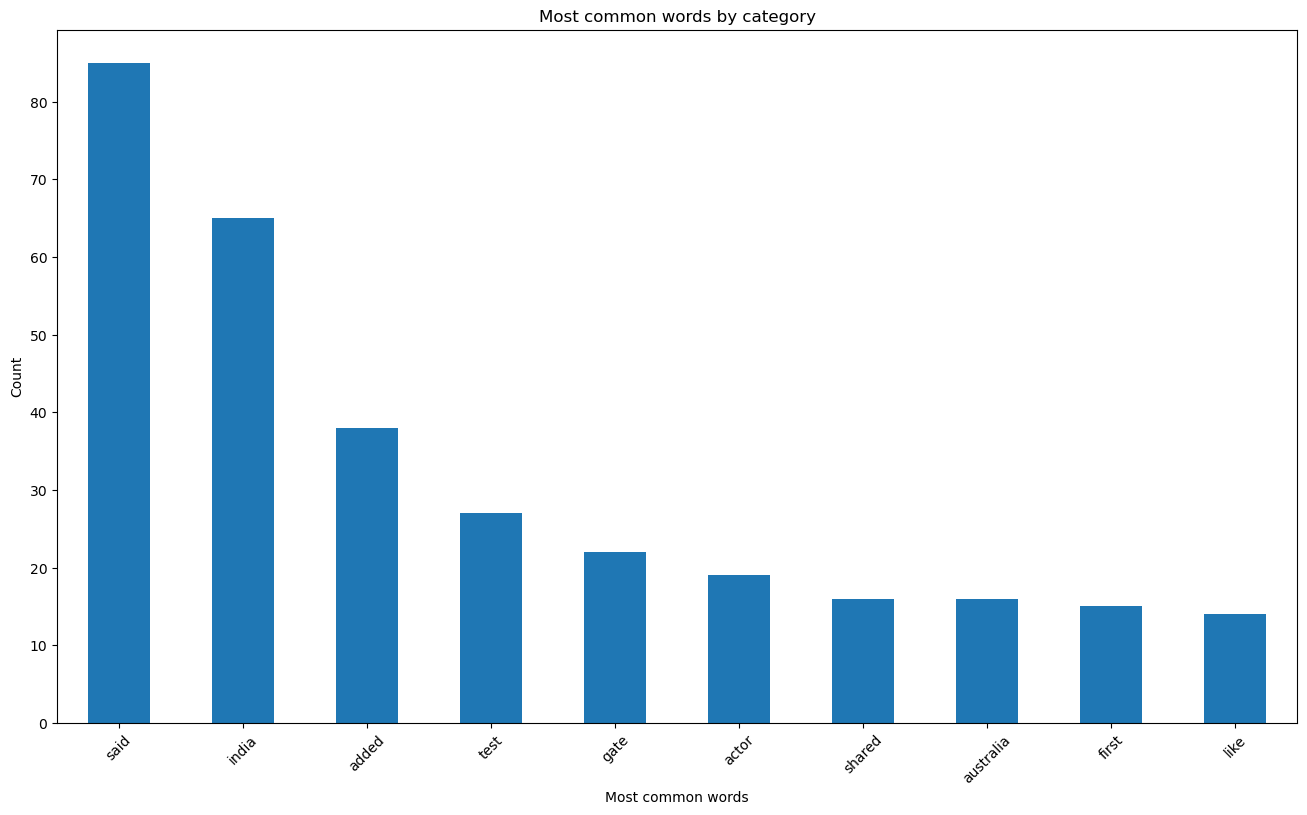

In [39]:
news_word_freq.sort_values(ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

In [40]:
top_news_content_bigrams = news_content_bigrams.value_counts().head(10)

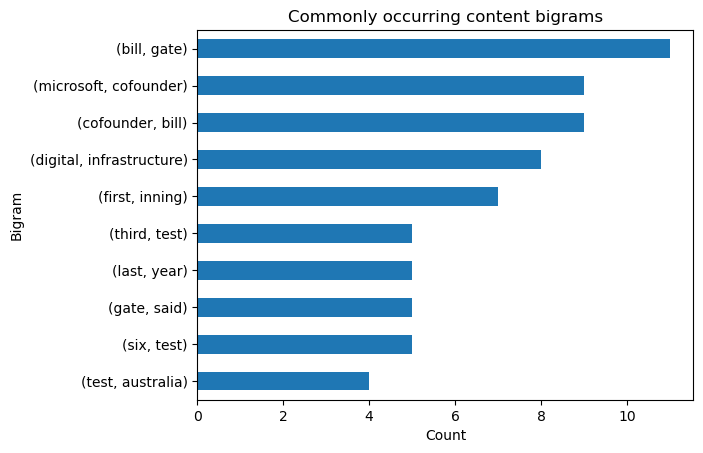

In [41]:
top_news_content_bigrams.plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Commonly occurring content bigrams')
plt.show()